In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
apple_stock = pd.read_csv('apple_stock.csv', index_col='Date')

In [67]:
apple_stock.index = pd.to_datetime(apple_stock.index)  # datetime으로 형변환

In [68]:
apple_stock.sort_index(inplace=True)

<Axes: xlabel='Date'>

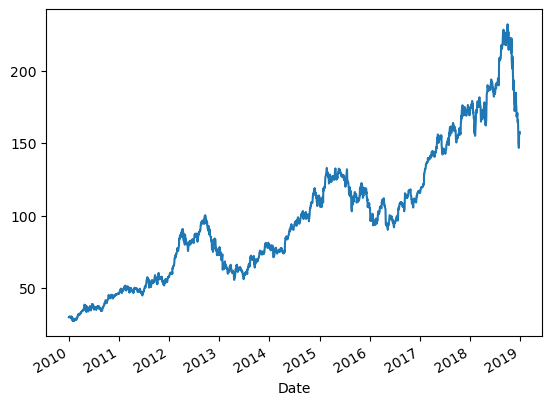

In [69]:
apple_stock.loc[:,"Close"].plot() 

In [70]:
a = np.array( apple_stock.Close )  #before_normalization
a = a.reshape(-1,1)

from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()   

after_Normalization = scaler.fit_transform(a) #after_Normalization 

In [71]:
after_Normalization = after_Normalization.reshape(-1,5,1)
print(after_Normalization.shape) 

(453, 5, 1)


In [72]:
X_train = after_Normalization[:, 0:4 ,0]  
X_train = X_train.reshape(-1,4,1)
Y_train = after_Normalization[:, 4, 0]
Y_train = Y_train.reshape(-1,1)

print(X_train.shape)  
print(Y_train.shape) 

(453, 4, 1)
(453, 1)


In [73]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, LSTM

def make_model() :
    model = Sequential()
    model.add(LSTM(2,activation="tanh" ,input_shape=(4, 1)))
    model.add(Dense(1))       
    model.compile(loss='mse', optimizer='sgd')
    model.summary()
    return model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 2)                 32        
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


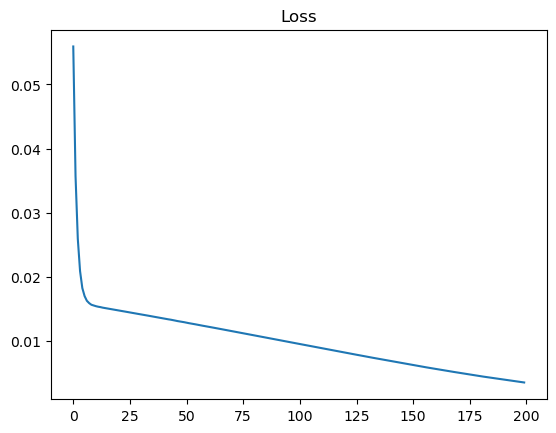

In [74]:
model = make_model() 
history = model.fit(X_train, Y_train, epochs=200 , validation_split =0.2, verbose=0)

# 학습 후 loss
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [75]:
y_predict = model.predict( after_Normalization[0, 0:4, 0].reshape(-1,4,1))
print(y_predict,   after_Normalization[0 , 4, 0 ])

reverseData = scaler.inverse_transform(   after_Normalization[0 , 4, 0 ].reshape(-1,1) )
y_predict = scaler.inverse_transform(   y_predict )
print( y_predict, reverseData ) 

1/1 [==============================] - 0s 195ms/step
[[0.11250428]] 0.01293596677571468
[[50.457947]] [[30.08285713]]


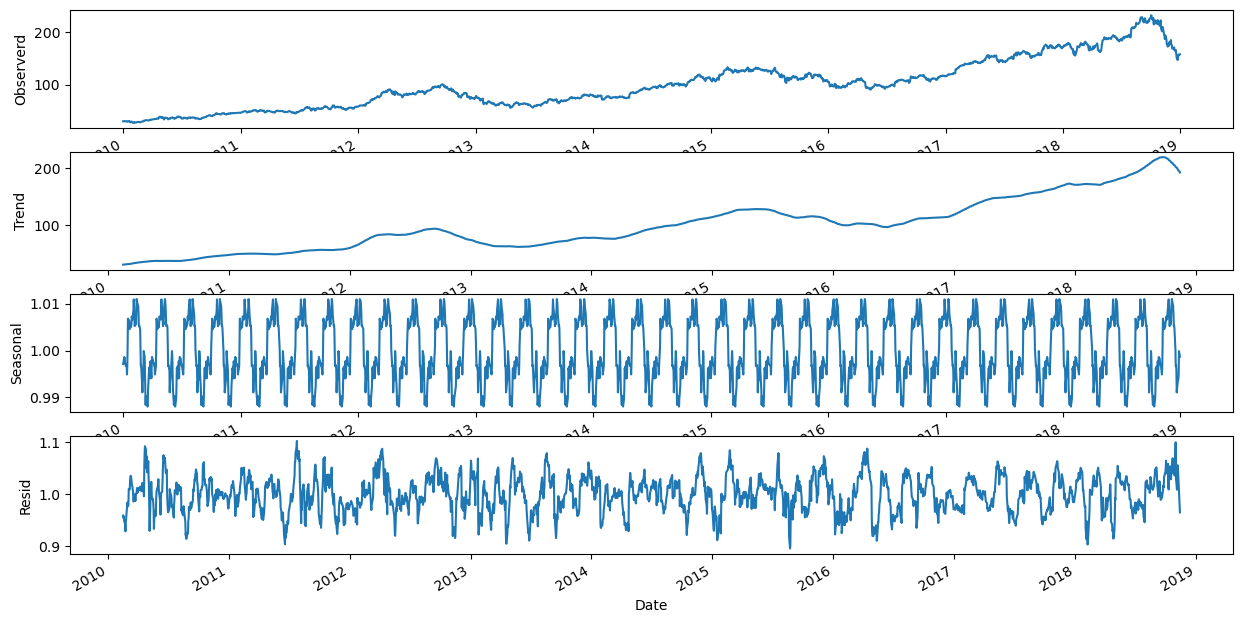

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose  
result = seasonal_decompose(apple_stock["Close"], model='multiplicative', period=60) 

def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot (legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot (legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot (legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot  (legend=False, ax=ax4)
    ax4.set_ylabel('Resid')
    
plot_decompose(result )